Hi Learners,

Welcome to the project on NLP.

## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

### Dataset:

The dataset has the following columns:
* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone
 

# Objective:

To implement the techniques learned as a part of the course.


## Learning Outcomes:

* Basic understanding of text pre-processing.
* What to do after text pre-processing
* Bag of words
* Tf-idf
* Build the classification model.
* Evaluate the Model
 

### Steps and tasks:

1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)
2. Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)
    - Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.
    - Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.
    - Plot the word cloud graph of tweets for positive and negative sentiment separately.
3. Understand of data columns: (3 Marks)
    - Drop all other columns except “text” and “airline_sentiment”.
    - Check the shape of the data.
    - Print the first 5 rows of data.
4. Text pre-processing: Data preparation. (12 Marks)
     - Html tag removal.
     - Tokenization.
     - Remove the numbers.
     - Removal of Special Characters and Punctuations.
     - Removal of stopwords
     - Conversion to lowercase.
     - Lemmatize or stemming.
     - Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
     - Print the first 5 rows of data after pre-processing.
     
**NOTE:-** Each text pre-processing step should be mentioned in the notebook separately.
     
5. Vectorization: (8 Marks)
    - Use CountVectorizer.
    - Use TfidfVectorizer.
6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types
    of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)
7. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    the performance of your model on this dataset. (6 Marks)
8. Overall notebook should have:(4 Marks)
     - Well commented code
     - Structure and flow

 

## Best Practices for the Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

### Submission Guidelines :

1. The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
2. Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
    - Submission will not be evaluated if,
    - it is submitted post-deadline, or,
    - more than 2 files are submitted
  

Regards

Program Office

Happy Learning!

## Scoring guide (Rubric) - Twitter US Airline Sentiment

|Criteria               | Points        |
|:----------------------|--------------:|
| Data Summary <br/>Add your view and opinion along with the problem statement, shape of the data, data description.| 4 |
| Exploratory data analysis<br/> Plot all (a,b and c) of the graphs that are mentioned in the 2nd section of the problem statement. Mention the observations & insights after plotting each graph.| 9 |
| Understanding of Data Columns<br/> Drop unnecessary columns, chek shape of the data, print 1st few rows of data. | 3 |
| Data Pre - Processing <br/> Apply all necessary pre-processing steps for this task. Print the first few rows of data after pre-processing. | 12 |
| Vectorization <br/> Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model | 8 |
| Modelling , tuning and Evaluation <br/> - Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix <br/> - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks) | 14 |
| Conclusion <br/> - Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset. | 6 |
| Overall Structure and flow of Notebook <br/> Structure and flow Well commented code | 4 |
|                              |                             |
|                              | Points: 60                  |

# Import the libraries, load dataset, print the shape of data, data description. (4 Marks)

### Step 1: Load Libraries & Packages
We will be needing the following packages & libraries to load the data, visualizations, EDA, preprocessing, model building, evaluations & tuning.

**Libraries & Packages:**

* re (regular expressions)
* string & unicode
* Numpy
* Pandas
* Matplotlib
* seaborn
* wordcloud
* NLTK
* SkLearn

In [1]:
# Code Cell: 1
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

from bs4 import BeautifulSoup
import re, string, unicodedata
import contractions

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Code Cell: 2
# download the various datasets related to grammer & corpus
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PradeepSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PradeepSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PradeepSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Code Cell: 3
# initialize seed values for reproduceability
RANDOM_SEED = 499
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [4]:
# Code Cell: 4
# I have an nvidia RTX 2070 on my machine - check to see if it is available
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.6.0
Keras Version: 2.6.0

Python 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.2
Scikit-Learn 0.24.2
GPU is available


### Step 2: Load Dataset and Check Data

We will load dataset (present in the same directory as the notebook - a csv file with name ```Tweets.csv```). In this step we will perform the following operations.

1. Load dataset using pandas.
2. Check the shape of the dataframe.
3. Print out the information about the dataset.

In [5]:
# Code Cell: 5
df_tweets = pd.read_csv('Tweets.csv', parse_dates=['tweet_created'])
print(f'Shape of the dataframe is: {df_tweets.shape}')

Shape of the dataframe is: (14640, 15)


In [6]:
# Code Cell: 6
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   tweet_id                      14640 non-null  int64                                 
 1   airline_sentiment             14640 non-null  object                                
 2   airline_sentiment_confidence  14640 non-null  float64                               
 3   negativereason                9178 non-null   object                                
 4   negativereason_confidence     10522 non-null  float64                               
 5   airline                       14640 non-null  object                                
 6   airline_sentiment_gold        40 non-null     object                                
 7   name                          14640 non-null  object                        

# Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)

### Tasks:

1. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
2. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
3. Plot the word cloud graph of tweets for positive and negative sentiment separately.
4. Mention the observations & insights after plotting each graph.

#### Task 1: Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.

In [7]:
# Code Cell: 7
df_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada)


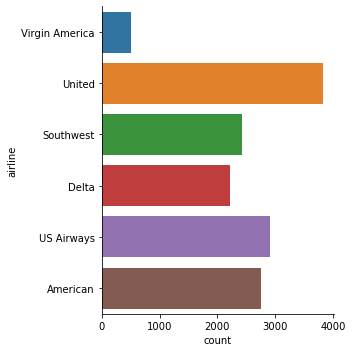

In [8]:
# Code Cell: 8
sns.catplot(data=df_tweets, y='airline', kind="count")

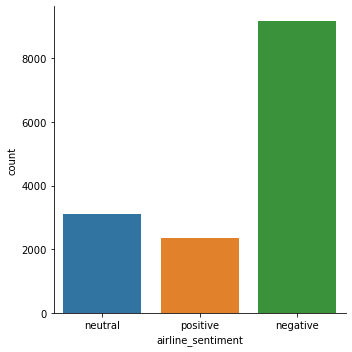

In [9]:
# Code Cell: 9
sns.catplot(data=df_tweets, x='airline_sentiment', kind="count")

#### Task 2: Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.

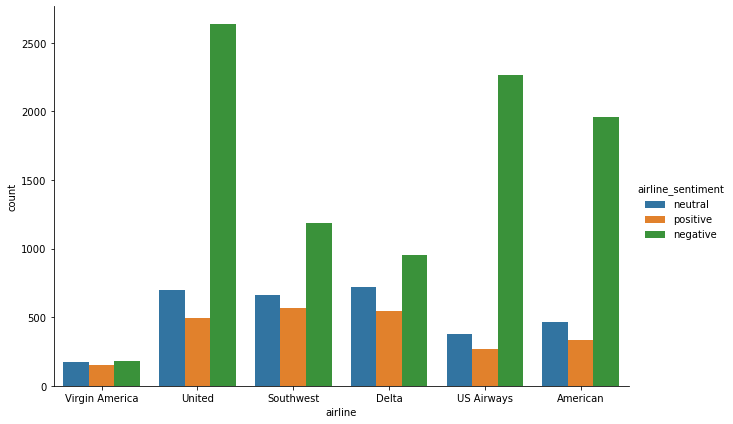

In [10]:
# Code Cell: 10
sns.catplot(data=df_tweets, x='airline', hue='airline_sentiment', kind="count", height=6, aspect=1.5)

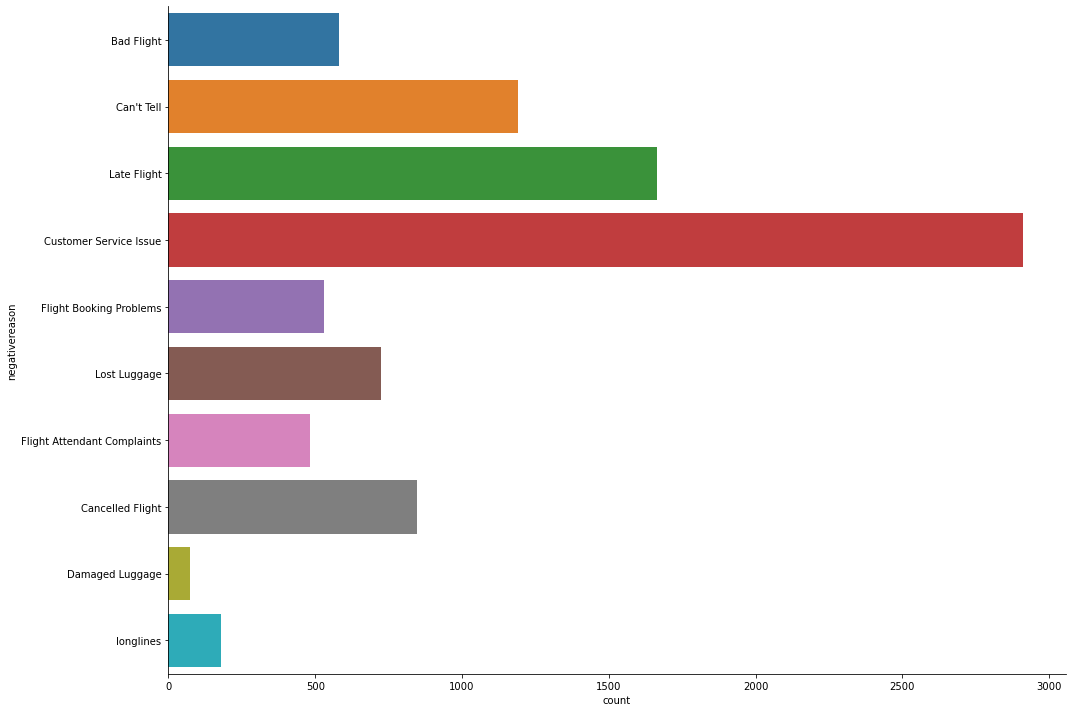

In [11]:
# Code Cell: 11
sns.catplot(data=df_tweets, y='negativereason', kind="count", height=10, aspect=1.5)

#### Task 4: Plot the word cloud graph of tweets for positive and negative sentiment separately.

A few things to fix before plotting the word graph.
* Because of the way how twitter works - people generally tag the account of businesses to grab their attention and also provide the contaxt about what they are talking.
* This means that we would need to remove the airline user account handles to make sure that we get the words of the language as the top words rather than the company twitter handles. 

In [12]:
# Code Cell: 12
def create_word_cloud(wordsCloud, title):
    plt.figure(figsize = (16, 10))
    plt.imshow(wordsCloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show();
def remove_twitter_handles(x):
    return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","", x)

df_tweets['text_handles_removed'] = df_tweets['text'].apply(remove_twitter_handles)
    
positive_reviews = df_tweets[df_tweets.airline_sentiment == "positive"]
neutral_reviews = df_tweets[df_tweets.airline_sentiment == "neutral"]
negative_reviews = df_tweets[df_tweets.airline_sentiment == "negative"]

#positive_reviews_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", positive_reviews.text).split())
positive_reviews_text = " ".join(positive_reviews.text_handles_removed.to_numpy().tolist())
neutral_reviews_text = " ".join(neutral_reviews.text_handles_removed.to_numpy().tolist())
negative_reviews_text = " ".join(negative_reviews.text_handles_removed.to_numpy().tolist())

positive_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positive_reviews_text)
neutral_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neutral_reviews_text)
negative_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(negative_reviews_text)

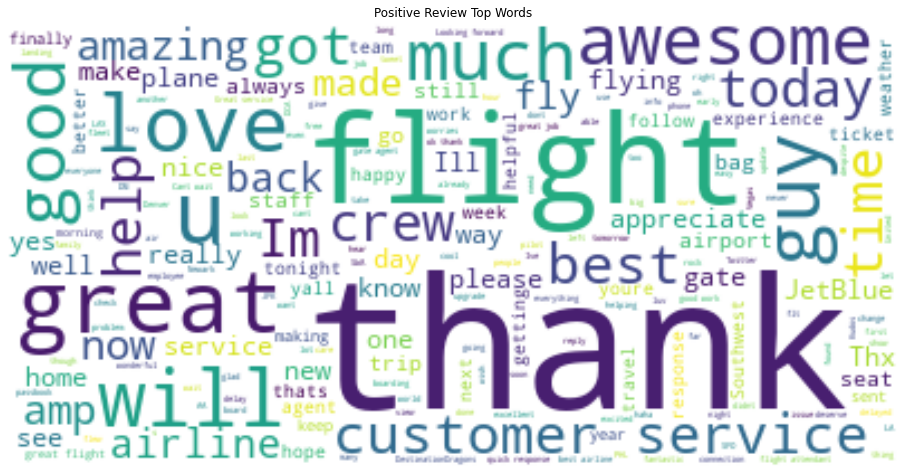

In [13]:
# Code Cell: 13
create_word_cloud(positive_reviews_cloud, "Positive Review Top Words")

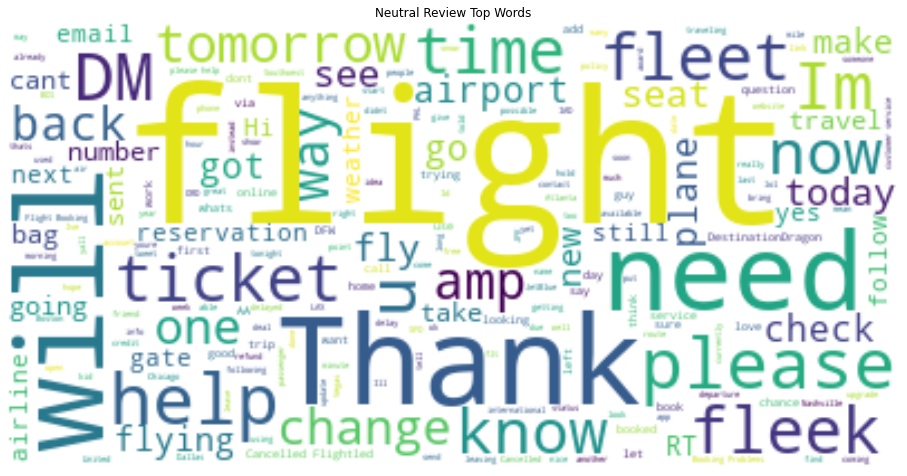

In [14]:
# Code Cell: 14
create_word_cloud(neutral_reviews_cloud, "Neutral Review Top Words")

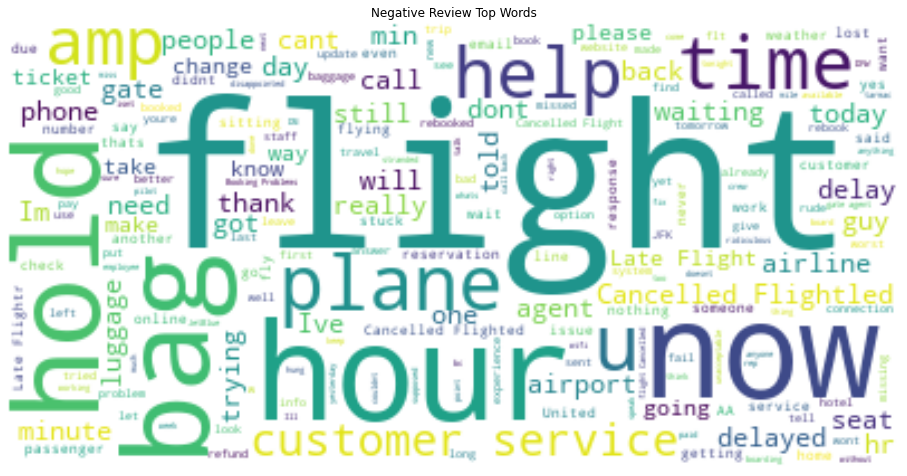

In [15]:
# Code Cell: 15
create_word_cloud(negative_reviews_cloud, "Negative Review Top Words")

#### Task 4: Mention the observations & insights after plotting each graph.

1. One of the striking observation from the data is that amongst all sentiments - word ```flight``` is quite common.
2. Based on this we can very definitely use the TfIdfVectorizer as this would give us the words of high importance across each category.
3. Reviews are collected in almost equal amounts from all airlines except for 'United' & 'Virgin America' which are most & least discussed airlines, this could be due to the market position of these companies.
4. Our dataset is skewed towards negative reviews which means that most of the reviews belong to this category, both positive & neutral reviews combined are less than the total number of negative reviews.
5. United is the most hated airline followed by US Airways by twitterati.
6. Mostly customers complain about Customer Service & Flight Delays.
7. We have quite a bit of data missing in columns such as negative reasons but we don't care about it as we are mostly focused airline_sentiment and text of the tweets.

# Understand of data columns: (3 Marks)

### Tasks:

1. Drop all other columns except “text” and “airline_sentiment”.
2. Check the shape of the data.
3. Print the first 5 rows of data.

#### Task 1: Drop all other columns except “text” and “airline_sentiment”.

In this task rather than using the original "text" column we will use the "text_handles_removed" column that we created in one of the previous steps (code cell: 12). This will save us the hassle of removing this later in the preprocessing steps.

In [16]:
# Code Cell: 16
# (X, y) => ('text_handles_removed', 'airline_sentiment')
df_tweets_final = df_tweets.loc[:, ['text_handles_removed', 'airline_sentiment']]

#### Task 2: Check the shape of the data.

The data should have a shape of 14640 X 2.

In [17]:
# Code Cell: 17
print(f'Final Data Shape: {df_tweets_final.shape}')

Final Data Shape: (14640, 2)


### Task 3: Print the first 5 rows of data

In [18]:
# Code Cell: 18
df_tweets_final.head(5)

,text_handles_removed,airline_sentiment
0,What said,neutral
1,plus youve added commercials to the experienc...,positive
2,I didnt today Must mean I need to take anothe...,neutral
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative


# Text pre-processing: Data preparation. (12 Marks)

### Tasks

1. Html tag removal.
2. Tokenization.
3. Remove the numbers.
4. Removal of Special Characters and Punctuations.
5. Removal of stopwords
6. Conversion to lowercase.
7. Lemmatize or stemming.
8. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
9. Print the first 5 rows of data after pre-processing.

#### Task 1: Html tag removal

We don't have HTML tags in the data but still I am doing it because I haven't seen all the text and it wouldn't harm to clean it anyways.

In [19]:
# Code Cell: 19
def remove_html(text):
    return BeautifulSoup(text).get_text()
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)
df_tweets_final['text'] = df_tweets_final['text_handles_removed'].apply(remove_html)
df_tweets_final['text'] = df_tweets_final['text'].apply(replace_contractions)
df_tweets_final.head()

,text_handles_removed,airline_sentiment,text
0,What said,neutral,What said
1,plus youve added commercials to the experienc...,positive,plus you have added commercials to the experie...
2,I didnt today Must mean I need to take anothe...,neutral,I did not today Must mean I need to take anoth...
3,its really aggressive to blast obnoxious ente...,negative,its really aggressive to blast obnoxious enter...
4,and its a really big bad thing about it,negative,and its a really big bad thing about it


In [20]:
# Code Cell: 20
df_tweets_final = df_tweets_final.drop(['text_handles_removed'], axis=1)

In [21]:
# Code Cell: 21
df_tweets_final.head()

,airline_sentiment,text
0,neutral,What said
1,positive,plus you have added commercials to the experie...
2,neutral,I did not today Must mean I need to take anoth...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it


#### Task 2: Tokenization

We will tokenize the words using ```nltk.word_tokenize``` and store the tokens in a new column - although from an engineering perspective - this should have happened after removing numbers and lowercase conversion. It is for this reason I am going to perform all these steps before and then perform this task.

#### Task 3: Remove the numbers

For removing the numbers I am going to use the regular expression library ```re```.

In [22]:
# Code Cell: 22
def remove_numbers(text):
    return re.sub(r'[0-9]', '', text)
df_tweets_final['text'] = df_tweets_final['text'].apply(remove_numbers)

In [23]:
# Code Cell: 23
df_tweets_final.head()

,airline_sentiment,text
0,neutral,What said
1,positive,plus you have added commercials to the experie...
2,neutral,I did not today Must mean I need to take anoth...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it


#### Task 4: Removal of Special Characters and Punctuations

We can remove the non ascii characters from the string and punctuations using a single function, this would be cleaner and better approach (in terms of time complexity as well).

In [24]:
# Code Cell: 24
def remove_special_and_punctuation_chars(text):
    acii_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r'[^\w\s]', '', acii_text)

df_tweets_final['text'] = df_tweets_final['text'].apply(remove_special_and_punctuation_chars)
df_tweets_final.head()

,airline_sentiment,text
0,neutral,What said
1,positive,plus you have added commercials to the experie...
2,neutral,I did not today Must mean I need to take anoth...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it


#### Task 5: Removal of stopwords

We will remove the stop words after converting everything to lowercase and tokenizing the words, this would make it easier for us to do these steps without using nested loops.

#### Task 6: Conversion to lowercase

We will use the ```lower()``` function from the strings library of python.

In [25]:
# Code Cell: 25
def convert_to_lowercase(text):
    return text.lower()

df_tweets_final['text'] = df_tweets_final['text'].apply(convert_to_lowercase)
df_tweets_final.head()

,airline_sentiment,text
0,neutral,what said
1,positive,plus you have added commercials to the experie...
2,neutral,i did not today must mean i need to take anoth...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it


#### Task 2: Tokenization

As mentioned above - now we can tokenize the sentences into words so that we have a cleaner text that can be broken down into tokens without having have a nested loop inside the transformation functions. All the remaining tasks would now work on the collection/list-like data.

In [26]:
# Code Cell: 26
def create_tokens(text):
    return nltk.word_tokenize(text)

df_tweets_final['tokens'] = df_tweets_final['text'].apply(create_tokens)
df_tweets_final.head()

,airline_sentiment,text,tokens
0,neutral,what said,"[what, said]"
1,positive,plus you have added commercials to the experie...,"[plus, you, have, added, commercials, to, the,..."
2,neutral,i did not today must mean i need to take anoth...,"[i, did, not, today, must, mean, i, need, to, ..."
3,negative,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, obnoxious..."
4,negative,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]"


### Task 5: Removal of stopwords

As we said above that we will remove the stop words after tokenizing the sentences, it's now time to update the ```tokens``` column in our dataset and remove the stop words.

In [27]:
# Code Cell: 27
def remove_stopwords(words):
    stop_words = set(stopwords.words("english"))
    return [word for word in words if not word in stop_words]

df_tweets_final['tokens'] = df_tweets_final['tokens'].apply(remove_stopwords)
df_tweets_final.head()

,airline_sentiment,text,tokens
0,neutral,what said,[said]
1,positive,plus you have added commercials to the experie...,"[plus, added, commercials, experience, tacky]"
2,neutral,i did not today must mean i need to take anoth...,"[today, must, mean, need, take, another, trip]"
3,negative,its really aggressive to blast obnoxious enter...,"[really, aggressive, blast, obnoxious, enterta..."
4,negative,and its a really big bad thing about it,"[really, big, bad, thing]"


#### Task 7: Lemmatize or stemming

In this step we will bifurcate the tokens into lemmatized and stemmed tokens. Although both of them should have more or less same effect but we can experiment with both.

In [28]:
# Code Cell: 28
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()
def stem_words(words):
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems
def lemmatize_words(words):
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

df_tweets_final['token_stems'] = df_tweets_final['tokens'].apply(stem_words)
df_tweets_final['token_lemmas'] = df_tweets_final['tokens'].apply(lemmatize_words)
df_tweets_final.head()

,airline_sentiment,text,tokens,token_stems,token_lemmas
0,neutral,what said,[said],[said],[say]
1,positive,plus you have added commercials to the experie...,"[plus, added, commercials, experience, tacky]","[plu, ad, commerc, expery, tacky]","[plus, add, commercials, experience, tacky]"
2,neutral,i did not today must mean i need to take anoth...,"[today, must, mean, need, take, another, trip]","[today, must, mean, nee, tak, anoth, trip]","[today, must, mean, need, take, another, trip]"
3,negative,its really aggressive to blast obnoxious enter...,"[really, aggressive, blast, obnoxious, enterta...","[real, aggress, blast, obnoxy, entertain, gues...","[really, aggressive, blast, obnoxious, enterta..."
4,negative,and its a really big bad thing about it,"[really, big, bad, thing]","[real, big, bad, thing]","[really, big, bad, thing]"


##### Choosing between stems & lemmas

As we can see stemmed words are just trimmed sometimes making it a non-english, while the ensemble machine learning models won't care much about it but the embeddings based model using RNNs and tensorflow would not like it. Also it is not very intuitive for us as well to analyze the results of our predictions, hence I am only going to use the lemmas and drop the stems from the dataframe. Before proceeding any further I will also replace the tokens with the lemmas.

In [29]:
# Code Cell: 29
df_tweets_final['tokens'] = df_tweets_final['token_lemmas']
df_tweets_final = df_tweets_final.drop(['token_stems', 'token_lemmas'], axis=1)
df_tweets_final.head()

,airline_sentiment,text,tokens
0,neutral,what said,[say]
1,positive,plus you have added commercials to the experie...,"[plus, add, commercials, experience, tacky]"
2,neutral,i did not today must mean i need to take anoth...,"[today, must, mean, need, take, another, trip]"
3,negative,its really aggressive to blast obnoxious enter...,"[really, aggressive, blast, obnoxious, enterta..."
4,negative,and its a really big bad thing about it,"[really, big, bad, thing]"


#### Task 8: Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)

Let's join the words (lemmas) to form a string and store them in a new column - we will not alter the origin ```text``` column but rather into a new column ```text_lemmas```.

In [30]:
# Code Cell: 30
def join_words(words):
    return " ".join(words)

df_tweets_final['text_lemmas'] = df_tweets_final['tokens'].apply(join_words)
df_tweets_final.head()

,airline_sentiment,text,tokens,text_lemmas
0,neutral,what said,[say],say
1,positive,plus you have added commercials to the experie...,"[plus, add, commercials, experience, tacky]",plus add commercials experience tacky
2,neutral,i did not today must mean i need to take anoth...,"[today, must, mean, need, take, another, trip]",today must mean need take another trip
3,negative,its really aggressive to blast obnoxious enter...,"[really, aggressive, blast, obnoxious, enterta...",really aggressive blast obnoxious entertainmen...
4,negative,and its a really big bad thing about it,"[really, big, bad, thing]",really big bad thing


#### Task 9: Print the first 5 rows of data after pre-processing.

Although we have been showing the data several times till now - here it is one more time.
**Note:** I will only include the required columns once I am ready for model building.

In [31]:
# Code Cell: 31
df_tweets_final.head()    # No point in specifying 5 in the parameters as default value is 5.

,airline_sentiment,text,tokens,text_lemmas
0,neutral,what said,[say],say
1,positive,plus you have added commercials to the experie...,"[plus, add, commercials, experience, tacky]",plus add commercials experience tacky
2,neutral,i did not today must mean i need to take anoth...,"[today, must, mean, need, take, another, trip]",today must mean need take another trip
3,negative,its really aggressive to blast obnoxious enter...,"[really, aggressive, blast, obnoxious, enterta...",really aggressive blast obnoxious entertainmen...
4,negative,and its a really big bad thing about it,"[really, big, bad, thing]",really big bad thing


# Vectorization: (8 Marks)

1. Use CountVectorizer
2. Use TfidfVectorizer

In [32]:
# Code Cell: 32
#Vectorize Using CountVectorizer: Use Vanilla Version of Vectorizer with no hyperparameter except for max_features
count_vectorizer = CountVectorizer(max_features=20000)  # taking all possible features
X_count_vectorizer = count_vectorizer.fit_transform(df_tweets_final['text_lemmas'])
y = df_tweets_final.loc[:,['airline_sentiment']]

In [33]:
# Code Cell: 33
print(f'Count Vectorizer Vocabulary: \n{dict(sorted(count_vectorizer.vocabulary_.items(), key=lambda item: item[1]))}')
print(f'\nCount Vectorizer Feature Names: \n{count_vectorizer.get_feature_names()}')
print(f'\nCount Vectorizer Feature Count: \n{len(count_vectorizer.get_feature_names())}')
print(f'\nCount Vectors: {X_count_vectorizer.toarray()}')
print(f'\nCount Vectors Shape: {X_count_vectorizer.shape}')

Count Vectorizer Vocabulary: 
{'aa': 0, 'aaaand': 1, 'aaadvantage': 2, 'aaalwayslate': 3, 'aaba': 4, 'aacom': 5, 'aadavantage': 6, 'aadelay': 7, 'aadfw': 8, 'aadv': 9, 'aadvantage': 10, 'aafail': 11, 'aal': 12, 'aampc': 13, 'aano': 14, 'aaron': 15, 'aas': 16, 'aaso': 17, 'aateam': 18, 'aaus': 19, 'ab': 20, 'aback': 21, 'abandon': 22, 'abandonment': 23, 'abassinet': 24, 'abbreve': 25, 'abc': 26, 'abcdef': 27, 'abcletjetbluestreamfeed': 28, 'abcnews': 29, 'abcs': 30, 'abduct': 31, 'abi': 32, 'abidfw': 33, 'abilities': 34, 'ability': 35, 'able': 36, 'aboard': 37, 'aboout': 38, 'abound': 39, 'abq': 40, 'abroad': 41, 'absolute': 42, 'absolutely': 43, 'absorb': 44, 'absorber': 45, 'absoulutely': 46, 'absurd': 47, 'absurdity': 48, 'absurdly': 49, 'abt': 50, 'abundance': 51, 'abuse': 52, 'abysmal': 53, 'ac': 54, 'acarlcom': 55, 'acc': 56, 'accelerate': 57, 'accept': 58, 'acceptable': 59, 'acces': 60, 'access': 61, 'accessibility': 62, 'accessible': 63, 'accident': 64, 'accidentally': 65, 'acci

In [34]:
# Code Cell: 34
#Vectorize Using TfidfVectorizer: Use Vanilla Version of Vectorizer with no hyperparameter except for max_features
vectorizer_tf_idf = TfidfVectorizer(max_features=20000)
X_tf_idf = vectorizer_tf_idf.fit_transform(df_tweets_final['text_lemmas'])
print(f'Tfidf Vocabulary: {vectorizer_tf_idf.vocabulary_}')
idf = vectorizer_tf_idf.idf_
idf_values = dict(zip(vectorizer_tf_idf.get_feature_names(), idf))
print(f'\nIDF Values: {dict(sorted(idf_values.items(), key=lambda item: item[1]))}')
print(f'\nTF IDF Features: {vectorizer_tf_idf.get_feature_names()}')
print(f'\nTfIDF Vectors: {X_tf_idf.toarray()}')
print(f'\nTfIDF Vectors Shape: {X_tf_idf.toarray().shape}')

Tfidf Vocabulary: {'say': 8214, 'plus': 7227, 'add': 118, 'commercials': 1810, 'experience': 3223, 'tacky': 9169, 'today': 9503, 'must': 6192, 'mean': 5809, 'need': 6273, 'take': 9181, 'another': 446, 'trip': 9655, 'really': 7674, 'aggressive': 194, 'blast': 1032, 'obnoxious': 6592, 'entertainment': 3030, 'guests': 4129, 'face': 3266, 'amp': 382, 'little': 5467, 'recourse': 7724, 'big': 983, 'bad': 764, 'thing': 9366, 'seriously': 8360, 'would': 10558, 'pay': 6990, 'flight': 3495, 'seat': 8287, 'playingits': 7193, 'fly': 3595, 'va': 10040, 'yes': 10650, 'nearly': 6269, 'every': 3133, 'time': 9452, 'vx': 10182, 'ear': 2851, 'worm': 10531, 'go': 3972, 'away': 718, 'miss': 6019, 'prime': 7410, 'opportunity': 6734, 'men': 5863, 'without': 10469, 'hat': 4224, 'parody': 6931, 'well': 10316, 'didntbut': 2540, 'amaze': 346, 'arrive': 568, 'hour': 4469, 'early': 2855, 'good': 3998, 'know': 5192, 'suicide': 9023, 'second': 8299, 'lead': 5327, 'death': 2336, 'among': 379, 'teens': 9248, 'lt': 559


TfIDF Vectors Shape: (14640, 10730)


# Build Model, Tune Model, Evaluate & List Top Features (14 Marks)

### Pre-requisites:

1. Onehot encode the labels.
2. Split the data into training & test sets

### Tasks:

1. Fit (I will be using RandomForest)
2. tune(optimize the parameter to improve the accuracy)
3. evaluate the model using both types of vectorization.
4. Print the top 40 features and plot their word cloud using both types of vectorization.

#### Pre-Requisite 1: Onehot encode the labels

In [35]:
# Code Cell: 35
enc = OrdinalEncoder()
enc.fit(y)
print(f'Categories: {enc.categories_}')
y_encoded = enc.transform(np.array(y))
y['airline_sentiment_enc'] = y_encoded
print(f'\nencoded data shape:\n{y.shape}')
print(f'\ny:\n{y.head()}')

# one hot encode the y
y_ohe = to_categorical(y['airline_sentiment_enc'])
print(f'One Hot Encoded Shape: {y_ohe.shape}')
print(f'First Label y[0]: {y_ohe[0]}')

Categories: [array(['negative', 'neutral', 'positive'], dtype=object)]

encoded data shape:
(14640, 2)

y:
  airline_sentiment  airline_sentiment_enc
0           neutral                    1.0
1          positive                    2.0
2           neutral                    1.0
3          negative                    0.0
4          negative                    0.0
One Hot Encoded Shape: (14640, 3)
First Label y[0]: [0. 1. 0.]


#### Pre-Requisite 2: Split the data into training & test sets

In [36]:
# Code Cell: 36
X_train_count_vectorizer, X_test_count_vectorizer, y_train_count_vectorizer, y_test_count_vectorizer = train_test_split(X_count_vectorizer, y_ohe, test_size=0.3, random_state = RANDOM_SEED, stratify=y_ohe)
X_train_tf_idf, X_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(X_tf_idf, y_ohe, test_size=0.3, random_state = RANDOM_SEED, stratify=y_ohe)

# count vectorizer shapes
print('Shape of data for CountVectorizer')
print('*********************************')
print(f'Count Vectorizer XTrain Shape: {X_train_count_vectorizer.shape}')
print(f'Count Vectorizer XTest Shape: {X_test_count_vectorizer.shape}')
print(f'Count Vectorizer YTrain Shape: {y_train_count_vectorizer.shape}')
print(f'Count Vectorizer YTest Shape: {y_test_count_vectorizer.shape}')
# tfidf shapes
print('\nShape of data for TfidfVectorizer')
print('*********************************')
print(f'Tfidf Vectorizer XTrain Shape: {X_train_tf_idf.shape}')
print(f'Tfidf Vectorizer XTest Shape: {X_test_tf_idf.shape}')
print(f'Tfidf Vectorizer YTrain Shape: {y_train_tf_idf.shape}')
print(f'Tfidf Vectorizer YTest Shape: {y_test_tf_idf.shape}')

Shape of data for CountVectorizer
*********************************
Count Vectorizer XTrain Shape: (10248, 10730)
Count Vectorizer XTest Shape: (4392, 10730)
Count Vectorizer YTrain Shape: (10248, 3)
Count Vectorizer YTest Shape: (4392, 3)

Shape of data for TfidfVectorizer
*********************************
Tfidf Vectorizer XTrain Shape: (10248, 10730)
Tfidf Vectorizer XTest Shape: (4392, 10730)
Tfidf Vectorizer YTrain Shape: (10248, 3)
Tfidf Vectorizer YTest Shape: (4392, 3)


## Task 1: Fit (I will be using RandomForest)

In [37]:
# Code Cell: 37
forest_count_vectorizer = RandomForestClassifier(n_estimators = 10,n_jobs=4)
forest_tf_idf = RandomForestClassifier(n_estimators = 10,n_jobs=4)
print('Training Random Forest with Count Vectorizer')
forest_count_vectorizer = forest_count_vectorizer.fit(X_train_count_vectorizer, y_train_count_vectorizer)
print('Finished Training Random Forest with Count Vectorizer')
print('\nTraining Random Forest with Tfidf Vectorizer')
forest_tf_idf = forest_tf_idf.fit(X_train_tf_idf, y_train_tf_idf)
print('Finished Training Random Forest with Tfidf Vectorizer')

Training Random Forest with Count Vectorizer
Finished Training Random Forest with Count Vectorizer

Training Random Forest with Tfidf Vectorizer
Finished Training Random Forest with Tfidf Vectorizer


In [38]:
# Code Cell: 38
result_count_vectorizer_train = forest_count_vectorizer.predict(X_train_count_vectorizer)
result_count_vectorizer = forest_count_vectorizer.predict(X_test_count_vectorizer)
result_tf_idf_train = forest_tf_idf.predict(X_train_tf_idf)
result_tf_idf = forest_tf_idf.predict(X_test_tf_idf)

In [39]:
# Code Cell: 39
#create results for X_train_count_vectorizer
actual_count_vectorizer_train = np.argmax(y_train_count_vectorizer, axis=1)
predicted_count_vectorizer_train = np.argmax(result_count_vectorizer_train, axis=1)
output_count_vectorizer_train = pd.DataFrame()
output_count_vectorizer_train['actual'] = actual_count_vectorizer_train
output_count_vectorizer_train['predicted'] = predicted_count_vectorizer_train

#create results for y_test_count_vectorizer
actual_count_vectorizer = np.argmax(y_test_count_vectorizer, axis=1)
predicted_count_vectorizer = np.argmax(result_count_vectorizer, axis=1)
output_count_vectorizer = pd.DataFrame()
output_count_vectorizer['actual'] = actual_count_vectorizer
output_count_vectorizer['predicted'] = predicted_count_vectorizer

In [40]:
# Code Cell: 40
#create results for y_train_tf_idf
actual_tf_idf_train = np.argmax(y_train_tf_idf, axis=1)
predicted_tf_idf_train = np.argmax(result_tf_idf_train, axis=1)
output_tf_idf_train = pd.DataFrame()
output_tf_idf_train['actual'] = actual_tf_idf_train
output_tf_idf_train['predicted'] = predicted_tf_idf_train

#create results for y_test_tf_idf
actual_tf_idf = np.argmax(y_test_tf_idf, axis=1)
predicted_tf_idf = np.argmax(result_tf_idf, axis=1)
output_tf_idf = pd.DataFrame()
output_tf_idf['actual'] = actual_tf_idf
output_tf_idf['predicted'] = predicted_tf_idf

#### Check Model Performances

We will see the performance of both models on test data.

In [41]:
# Code Cell: 41
sentiments = ['negative', 'neutral', 'positive']
classification_metrics_count_vectorizer_train = metrics.classification_report(actual_count_vectorizer_train, predicted_count_vectorizer_train, target_names=sentiments)
classification_metrics_count_vectorizer = metrics.classification_report(actual_count_vectorizer, predicted_count_vectorizer, target_names=sentiments)
print(f'Count Vectorizer Classification Report Test:\n{classification_metrics_count_vectorizer}')
print(f'\nCount Vectorizer Classification Report Train:\n{classification_metrics_count_vectorizer_train}')

classification_metrics_tf_idf_train = metrics.classification_report(actual_tf_idf_train, predicted_tf_idf_train, target_names=sentiments)
classification_metrics_tf_idf = metrics.classification_report(actual_tf_idf, predicted_tf_idf, target_names=sentiments)
print(f'\n\nTfidf Report Test:\n{classification_metrics_tf_idf}')
print(f'\nTfidf Report Train:\n{classification_metrics_tf_idf_train}')

Count Vectorizer Classification Report Test:
              precision    recall  f1-score   support

    negative       0.75      0.92      0.82      2753
     neutral       0.58      0.35      0.44       930
    positive       0.75      0.49      0.59       709

    accuracy                           0.73      4392
   macro avg       0.69      0.59      0.62      4392
weighted avg       0.71      0.73      0.71      4392


Count Vectorizer Classification Report Train:
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98      6425
     neutral       0.98      0.92      0.95      2169
    positive       0.98      0.93      0.96      1654

    accuracy                           0.97     10248
   macro avg       0.98      0.95      0.96     10248
weighted avg       0.97      0.97      0.97     10248



Tfidf Report Test:
              precision    recall  f1-score   support

    negative       0.74      0.95      0.83      2753
     neutral    

### Confusion Matrix For Count Vectorizer

<AxesSubplot:>

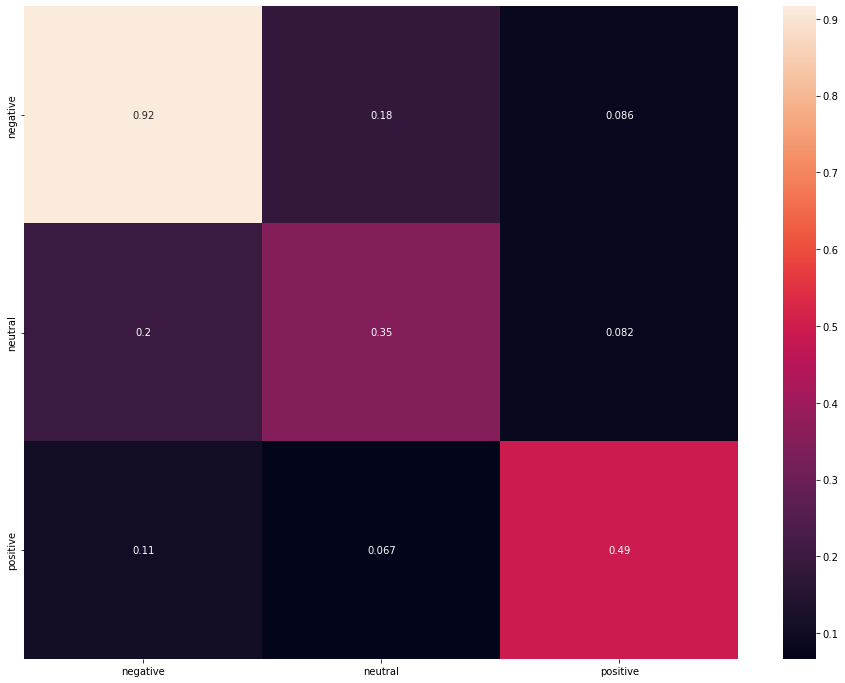

In [42]:
# Code Cell: 42
cf_matrix_count_vectorizer = confusion_matrix(np.array(actual_count_vectorizer), predicted_count_vectorizer)
cf_matrix_count_vectorizer_n1 = cf_matrix_count_vectorizer/np.sum(cf_matrix_count_vectorizer, axis=1)
plt.figure(figsize=(16,12))
sns.heatmap(cf_matrix_count_vectorizer_n1, xticklabels=sentiments, yticklabels=sentiments, annot=True)

### Confusion Matrix For Tfidf Vectorizer

<AxesSubplot:>

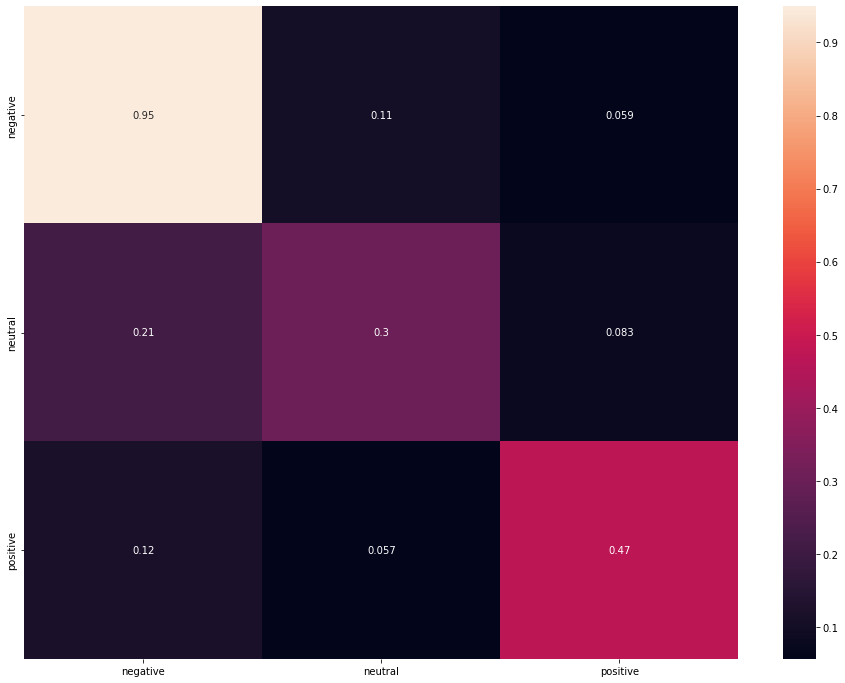

In [43]:
# Code Cell: 43
cf_matrix_tf_idf = confusion_matrix(np.array(actual_tf_idf), predicted_tf_idf)
cf_matrix_tf_idf_n1 = cf_matrix_tf_idf/np.sum(cf_matrix_tf_idf, axis=1) #normalize data
plt.figure(figsize=(16,12))
sns.heatmap(cf_matrix_tf_idf_n1, xticklabels=sentiments, yticklabels=sentiments, annot=True)

## Task 2: Tune(optimize the parameter to improve the accuracy)

We are seeing that our models are overfitting and here is what I think is happening:

1. We have put a high number for the features for both vectorizers (curse of dimensionality)
2. Tfidf based model is performing well as guessed earlier and that is because it penalizes words based on inverse document frequency. However we are not using this so we need to reduce the number of features.
3. There is a huge class imbalance so we need to now resample the data to fix this - we will create synthetic data.
4. I don't think using ngrams will make any difference because we are not trying extract granular context from the data.

In [44]:
# Code Cell: 44
# let's start with a clean slate

## let's try to fix the class imbalance
positive_tweets = df_tweets_final[df_tweets_final.airline_sentiment == "positive"]
negative_tweets = df_tweets_final[df_tweets_final.airline_sentiment == "negative"]
neutral_tweets = df_tweets_final[df_tweets_final.airline_sentiment == "neutral"]
print(len(positive_tweets))
print(len(negative_tweets))
print(len(neutral_tweets))
df_tweets_rebalanced = positive_tweets.sample(n=len(negative_tweets), random_state=RANDOM_SEED, replace=True)
df_tweets_neutral = neutral_tweets.sample(n=len(negative_tweets), random_state=RANDOM_SEED, replace=True)

df_tweets_rebalanced = df_tweets_rebalanced.append(negative_tweets).reset_index(drop=True)
df_tweets_rebalanced = df_tweets_rebalanced.append(df_tweets_neutral).reset_index(drop=True)
df_tweets_rebalanced


enc = OrdinalEncoder()
y = df_tweets_rebalanced.loc[:,['airline_sentiment']]
enc.fit(y)
print(f'Categories: {enc.categories_}')
y_encoded = enc.transform(np.array(y))
y['airline_sentiment_enc'] = y_encoded
y_ohe = to_categorical(y['airline_sentiment_enc'])

#Vectorize Using CountVectorizer: reduced the number of features
count_vectorizer = CountVectorizer(analyzer='word', max_features=1000)  # less features
X_count_vectorizer = count_vectorizer.fit_transform(df_tweets_rebalanced['text_lemmas'])
X_train_count_vectorizer, X_test_count_vectorizer, y_train_count_vectorizer, y_test_count_vectorizer = train_test_split(X_count_vectorizer, y_ohe, test_size=0.3, random_state = RANDOM_SEED, stratify=y_ohe)

forest_count_vectorizer = RandomForestClassifier(min_samples_leaf=1, min_samples_split=20, max_depth=100,criterion="entropy",random_state=RANDOM_SEED,n_estimators=50, n_jobs=10)
print('Training Random Forest with Count Vectorizer')
forest_count_vectorizer = forest_count_vectorizer.fit(X_train_count_vectorizer, y_train_count_vectorizer)
print('Finished Training Random Forest with Count Vectorizer')
result_count_vectorizer_train = forest_count_vectorizer.predict(X_train_count_vectorizer)
result_count_vectorizer = forest_count_vectorizer.predict(X_test_count_vectorizer)
actual_count_vectorizer_train = np.argmax(y_train_count_vectorizer, axis=1)
predicted_count_vectorizer_train = np.argmax(result_count_vectorizer_train, axis=1)
output_count_vectorizer_train = pd.DataFrame()
output_count_vectorizer_train['actual'] = actual_count_vectorizer_train
output_count_vectorizer_train['predicted'] = predicted_count_vectorizer_train

actual_count_vectorizer = np.argmax(y_test_count_vectorizer, axis=1)
predicted_count_vectorizer = np.argmax(result_count_vectorizer, axis=1)
output_count_vectorizer = pd.DataFrame()
output_count_vectorizer['actual'] = actual_count_vectorizer
output_count_vectorizer['predicted'] = predicted_count_vectorizer

sentiments = ['negative', 'neutral', 'positive']
classification_metrics_count_vectorizer_train = metrics.classification_report(actual_count_vectorizer_train, predicted_count_vectorizer_train, target_names=sentiments)
classification_metrics_count_vectorizer = metrics.classification_report(actual_count_vectorizer, predicted_count_vectorizer, target_names=sentiments)
print(f'Count Vectorizer Classification Report Test:\n{classification_metrics_count_vectorizer}')
print(f'\nCount Vectorizer Classification Report Train:\n{classification_metrics_count_vectorizer_train}')

2363
9178
3099
Categories: [array(['negative', 'neutral', 'positive'], dtype=object)]
Training Random Forest with Count Vectorizer
Finished Training Random Forest with Count Vectorizer
Count Vectorizer Classification Report Test:
              precision    recall  f1-score   support

    negative       0.82      0.83      0.83      2753
     neutral       0.80      0.87      0.84      2754
    positive       0.91      0.83      0.87      2754

    accuracy                           0.84      8261
   macro avg       0.85      0.84      0.84      8261
weighted avg       0.85      0.84      0.84      8261


Count Vectorizer Classification Report Train:
              precision    recall  f1-score   support

    negative       0.90      0.90      0.90      6425
     neutral       0.86      0.94      0.90      6424
    positive       0.96      0.87      0.91      6424

    accuracy                           0.90     19273
   macro avg       0.91      0.90      0.90     19273
weighted avg    

### Observations with Count Vectorizer

* I could not get the model performance in terms to go better than 84% (earlier it was 70%)
* The model is not overfitting and is able to generalize well in all metrics across training & test data
* Reducing the number of features helped along with hyperparameter tuning for random forest classifier

In [45]:
# Code Cell: 45
vectorizer_tf_idf = TfidfVectorizer(analyzer='word', max_features=500)
X_tf_idf = vectorizer_tf_idf.fit_transform(df_tweets_rebalanced['text_lemmas'])
X_train_tf_idf, X_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(X_tf_idf, y_ohe, test_size=0.3, random_state = RANDOM_SEED, stratify=y_ohe)
forest_tf_idf = RandomForestClassifier(min_samples_leaf=1, min_samples_split=20, max_depth=500,criterion="entropy",random_state=RANDOM_SEED,n_estimators = 20, n_jobs=10)
print('\nTraining Random Forest with Tfidf Vectorizer')
forest_tf_idf = forest_tf_idf.fit(X_train_tf_idf, y_train_tf_idf)
print('Finished Training Random Forest with Tfidf Vectorizer')
result_tf_idf_train = forest_tf_idf.predict(X_train_tf_idf)
result_tf_idf = forest_tf_idf.predict(X_test_tf_idf)

actual_tf_idf_train = np.argmax(y_train_tf_idf, axis=1)
predicted_tf_idf_train = np.argmax(result_tf_idf_train, axis=1)
output_tf_idf_train = pd.DataFrame()
output_tf_idf_train['actual'] = actual_tf_idf_train
output_tf_idf_train['predicted'] = predicted_tf_idf_train

actual_tf_idf = np.argmax(y_test_tf_idf, axis=1)
predicted_tf_idf = np.argmax(result_tf_idf, axis=1)
output_tf_idf = pd.DataFrame()
output_tf_idf['actual'] = actual_tf_idf
output_tf_idf['predicted'] = predicted_tf_idf
classification_metrics_tf_idf_train = metrics.classification_report(actual_tf_idf_train, predicted_tf_idf_train, target_names=sentiments)
classification_metrics_tf_idf = metrics.classification_report(actual_tf_idf, predicted_tf_idf, target_names=sentiments)
print(f'Tfidf Report Test:\n{classification_metrics_tf_idf}')
print(f'\nTfidf Report Train:\n{classification_metrics_tf_idf_train}')


Training Random Forest with Tfidf Vectorizer
Finished Training Random Forest with Tfidf Vectorizer
Tfidf Report Test:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      2753
     neutral       0.86      0.86      0.86      2754
    positive       0.91      0.90      0.91      2754

    accuracy                           0.87      8261
   macro avg       0.87      0.87      0.87      8261
weighted avg       0.87      0.87      0.87      8261


Tfidf Report Train:
              precision    recall  f1-score   support

    negative       0.95      0.96      0.96      6425
     neutral       0.94      0.95      0.94      6424
    positive       0.96      0.95      0.96      6424

    accuracy                           0.95     19273
   macro avg       0.95      0.95      0.95     19273
weighted avg       0.95      0.95      0.95     19273



### Observations with Tfidf Vectorizer

* I could not get the model performance in terms to go better than 87% (earlier it was 74%)
* The model is slightly overfitting but not as bad as the original model.
* Reducing the number of features helped along with hyperparameter tuning for random forest classifier
* Resampling the data helped

## Notes for the evaluator

**Please note that I have bypassed some of the best practices for this model like oversampling the entire dataset rather than upsampling the test data. I am aware of the consequences and as such would not do such things in the production code. This is just for experimentation only.**

Let's play around with both models a bit by providing the data that these would have definitely not seen.

## Task 3: evaluate the model using both types of vectorization.

In [46]:
# Code Cell: 46
custom_tweets = [
    "very bad flight, didn't like the food and also staff was horrible",
    'thank you for making my experience wonderful, it was an awesome flight',
    'okay flight',
    "horrible experience, wouldn't recommend anyone to fly with them",
    "very bad food and dirty toilets"
    "not bad",
    "very good captain and amazing staff, the captain was awesome, it was lovely"
]
custom_sentiments = [
    'negative',
    'positive',
    'neutral',
    'negative',
    'negative',
    'positive'
]

df_evaluation = pd.DataFrame()
df_evaluation['text'] = custom_tweets
df_evaluation['airline_sentiment'] = custom_sentiments
df_evaluation.head()

## now apply all steps on this data as we did earlier
df_evaluation['text_handles_removed'] = df_evaluation['text'].apply(remove_twitter_handles)
df_evaluation_final = df_evaluation.loc[:, ['text_handles_removed', 'airline_sentiment']]
df_evaluation_final['text'] = df_evaluation_final['text_handles_removed'].apply(remove_html)
df_evaluation_final['text'] = df_evaluation_final['text'].apply(replace_contractions)
df_evaluation_final = df_evaluation_final.drop(['text_handles_removed'], axis=1)
df_evaluation_final['text'] = df_evaluation_final['text'].apply(remove_numbers)
df_evaluation_final['text'] = df_evaluation_final['text'].apply(remove_special_and_punctuation_chars)
df_evaluation_final['text'] = df_evaluation_final['text'].apply(convert_to_lowercase)
df_evaluation_final['tokens'] = df_evaluation_final['text'].apply(create_tokens)
df_evaluation_final['tokens'] = df_evaluation_final['tokens'].apply(remove_stopwords)
df_evaluation_final['token_lemmas'] = df_evaluation_final['tokens'].apply(lemmatize_words)
df_evaluation_final['tokens'] = df_evaluation_final['token_lemmas']
df_evaluation_final = df_evaluation_final.drop(['token_lemmas'], axis=1)
df_evaluation_final['text_lemmas'] = df_evaluation_final['tokens'].apply(join_words)
X_count_vectorizer = count_vectorizer.transform(df_evaluation_final['text_lemmas'])
X_tf_idf = vectorizer_tf_idf.transform(df_evaluation_final['text_lemmas'])

y_eval = df_evaluation_final.loc[:,['airline_sentiment']]
y_encoded = enc.transform(np.array(y_eval))
y_eval['airline_sentiment_enc'] = y_encoded
y_ohe = to_categorical(y_eval['airline_sentiment_enc'])

result_tf_idf = forest_tf_idf.predict(X_tf_idf)
actual_tf_idf = np.argmax(y_ohe, axis=1)
predicted_tf_idf = np.argmax(result_tf_idf, axis=1)
classification_metrics_tf_idf = metrics.classification_report(actual_tf_idf, predicted_tf_idf, target_names=sentiments)
print(f'Tfidf Report Evaulation:\n{classification_metrics_tf_idf}')

result_count_vectorizer = forest_count_vectorizer.predict(X_count_vectorizer)
actual_count_vectorizer = np.argmax(y_ohe, axis=1)
predicted_count_vectorizer = np.argmax(result_count_vectorizer, axis=1)
classification_metrics_count_vectorizer = metrics.classification_report(actual_count_vectorizer, predicted_count_vectorizer, target_names=sentiments)
print(f'\nCount Vectorizer Classification Report Test:\n{classification_metrics_count_vectorizer}')

Tfidf Report Evaulation:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         3
     neutral       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


Count Vectorizer Classification Report Test:
              precision    recall  f1-score   support

    negative       1.00      0.67      0.80         3
     neutral       0.50      1.00      0.67         1
    positive       1.00      1.00      1.00         2

    accuracy                           0.83         6
   macro avg       0.83      0.89      0.82         6
weighted avg       0.92      0.83      0.84         6



In [47]:
# Code Cell: 47
output_tf_idf_eval = pd.DataFrame()
output_tf_idf_eval['actual'] = actual_tf_idf
output_tf_idf_eval['predicted'] = predicted_tf_idf
output_tf_idf_eval['text'] = df_evaluation['text']
output_tf_idf_eval.head(10)

,actual,predicted,text
0,0,0,"very bad flight, didn't like the food and also..."
1,2,2,"thank you for making my experience wonderful, ..."
2,1,1,okay flight
3,0,0,"horrible experience, wouldn't recommend anyone..."
4,0,0,very bad food and dirty toiletsnot bad
5,2,2,"very good captain and amazing staff, the capta..."


In [48]:
# Code Cell: 48
output_cv_eval = pd.DataFrame()
output_cv_eval['actual'] = actual_count_vectorizer
output_cv_eval['predicted'] = predicted_count_vectorizer
output_cv_eval['text'] = df_evaluation['text']
output_cv_eval.head(10)

,actual,predicted,text
0,0,0,"very bad flight, didn't like the food and also..."
1,2,2,"thank you for making my experience wonderful, ..."
2,1,1,okay flight
3,0,0,"horrible experience, wouldn't recommend anyone..."
4,0,1,very bad food and dirty toiletsnot bad
5,2,2,"very good captain and amazing staff, the capta..."


## Task 4: Print the top 40 features and plot their word cloud using both types of vectorization.

### Features For Count Vectorizer

In [49]:
# Code Cell: 49
bow_cv = count_vectorizer.transform(df_tweets_final['text_lemmas'])
sow_cv = bow_cv.sum(axis=0)
words_freq_cv_list = [(word, sow_cv[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
sorted_word_freq_cv = sorted(words_freq_cv_list, key = lambda x: x[1], reverse=True)
words_freq_cv = dict(sorted_word_freq_cv)
count_vec_top_words, _ = zip(*sorted_word_freq_cv)
print(f'Top Features For CountVectorizer: {count_vec_top_words[:40]}')

Top Features For CountVectorizer: ('flight', 'get', 'thank', 'cancel', 'service', 'delay', 'time', 'help', 'go', 'fly', 'call', 'bag', 'us', 'customer', 'wait', 'hold', 'make', 'need', 'hours', 'would', 'amp', 'plane', 'try', 'still', 'please', 'one', 'gate', 'back', 'seat', 'take', 'say', 'flightled', 'book', 'tell', 'hour', 'change', 'phone', 'know', 'check', 'like')


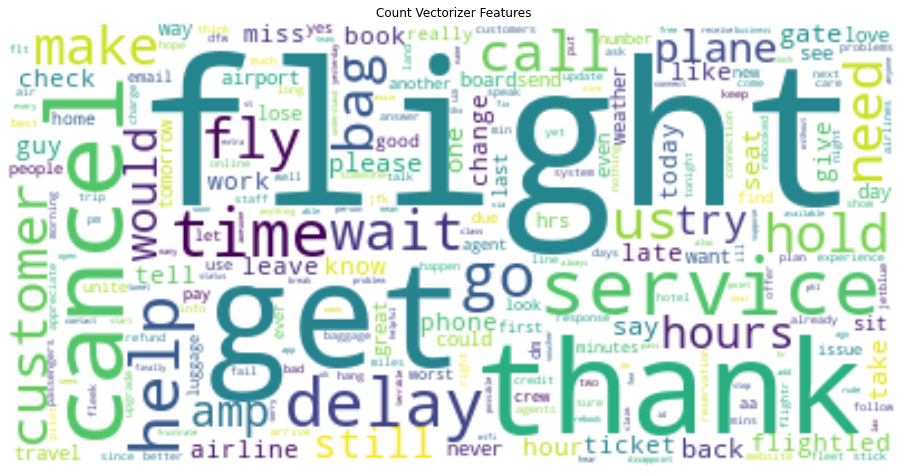

In [50]:
# Code Cell: 50
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(words_freq_cv)
plt.figure(figsize = (16, 10))
plt.imshow(wc, interpolation="bilinear")
plt.title("Count Vectorizer Features")
plt.axis("off")
plt.show()

### Features For TfIdf Vectorizer

In [51]:
# Code Cell: 51
bow_tf_idf = vectorizer_tf_idf.transform(df_tweets_final['text_lemmas'])
sow_tf_idf = bow_tf_idf.sum(axis=0)
words_freq_tfidf_list = [(word, sow_cv[0, idx]) for word, idx in vectorizer_tf_idf.vocabulary_.items()]
sorted_word_freq_tf_idf = sorted(words_freq_tfidf_list, key = lambda x: x[1], reverse=True)
words_freq_tf_idf = dict(sorted_word_freq_tf_idf)
tf_idf_top_words, _ = zip(*sorted_word_freq_tf_idf)
print(f'Top Features For TfIdf Vectorizer: {tf_idf_top_words[:40]}')

Top Features For TfIdf Vectorizer: ('problem', 'say', 'direct', 'jetblue', 'staff', 'second', 'read', 'different', 'club', 'horrible', 'storm', 'system', 'austin', 'save', 'close', 'purchase', 'dca', 'switch', 'even', 'watch', 'everything', 'wow', 'well', 'share', 'amaze', 'without', 'schedule', 'another', 'happy', 'dc', 'send', 'inflight', 'money', 'team', 'weeks', 'sell', 'strand', 'ua', 'member', 'aa')


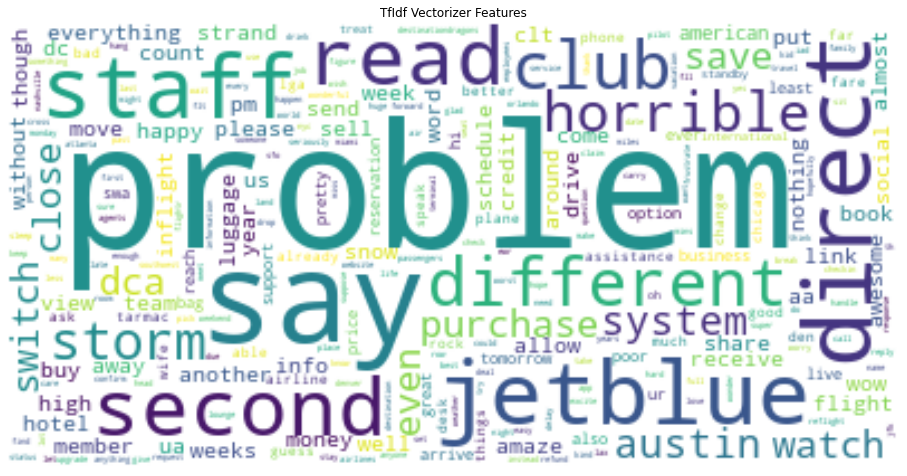

In [52]:
# Code Cell: 52
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(words_freq_tf_idf)
plt.figure(figsize = (16, 10))
plt.imshow(wc, interpolation="bilinear")
plt.title("TfIdf Vectorizer Features")
plt.axis("off")
plt.show()

# Summarize your understanding of the application of Various Pre-processing and Vectorization and the performance of your model on this dataset. (6 Marks)

The preprocessing steps that we did are the following:
1. We removed the twitter handles: Twitter handles from the NLP perspective are just noise because they are not linked to the sentiment, they are unique identifier and such helped us to only focus on the words which are important.
2. Removed HTML tags: Although the tweets that I saw did not contain any html tags but it is still helpful to run this step because data collected from the web can have html tags in it.
3. Expanded the contractions: Expanding the contractions helps in eliminating more words which otherwise would not have been removed, example ```I've``` becomes ```I have``` and ```don't``` get's expanded to ```do not``` and so on.
4. Remove the numbers: Except for certain specific use cases numbers can add unnecessary noise to the model and hence we can remove them from the data.
5. Removal of Special Characters and Punctuations: Special characters & punctuations are often present in text documents due to literary value or human understanding but in terms of statistical modeling they are useless and only increase the dimensionality.
6. Removal of stopwords: There are several words in most of the languages which are literary tools to convey - tense etc. - these are the most common words that are found in the languages but don't have much value in terms of analytical impact. Most of the times they don't contribute much to the semantic value of a phrase.
7. Conversion to lowercase  Most programming languages - including python - are case sensitive which means that the same word in different casing would be treated as separate word, example 'Good' and 'good' will be treated differently. This would increase the vector size without any value, so we can convert everything to lower case.
8. Lemmatize or stemming: Both lemmatization & stemming solve a very important problem - most lanugaue have root or stem words from which several forms of that word are derived, most common example are verbs like 'did', 'doing' and 'done' all are forms for word 'do'. Reducing words to stems or lemmas will help us in reducing the dimensions while still keeping the semantic meaning of the document intact.
9. Tokenization: Computers & machine learning algorithms work with numbers, this means that we cannot pass a running sentence into the algorithm - we first need to convert the string into a set of tokens which can then be vectorized to feed into the machine learning algorithms. Essentially tokenization is a form of converting something into it's fundamental building blocks - example document -> paragraphs, paragraph -> sentences, sentence -> words, word -> alphabet and so on.
11. Vectorization: We convert the tokens in a document/corpus into a bag of words also known as a vector. This is done so as to convert the textual data into numeric data which can then be fed into the machine learning models for training and prediction. Vectorization essentially results in giving us a set of features which are vectors representing the top/common words.
    * Count Vectorization: In this kind of vectorization we simply take the count of each word and pick up max number of words in the bag of words based on the hyperparameter 'max_features' - this results in a matrix which contains the indexes of different words as the bag of words collection.
    * Tf-Idf Vectorization: In this kind of vectorization we use a technique which penalizes token (in our examples so far words) if they are more common. This helps us in dimensionaly reduction by focusing on the words which appear less often and add significant value to the document context.
12. Resampling: I also resampled minority classes in the data as the model was struggling with these classes.

All the above steps have been performed to optimize the models, without running these steps we would have a very wide dataset which will contain a lot of noise.

# Overall notebook should have:(4 Marks)
     a. Well commented code: All the code in the notebook has been properly documented with explanation.
     b. Structure and flow: The document flows in the natural order of tasks defined in the objective/problem statement.